In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(iris_url)

In [20]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [21]:
iris.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
iris.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [24]:
iris.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Text(0, 0.5, 'Distance')

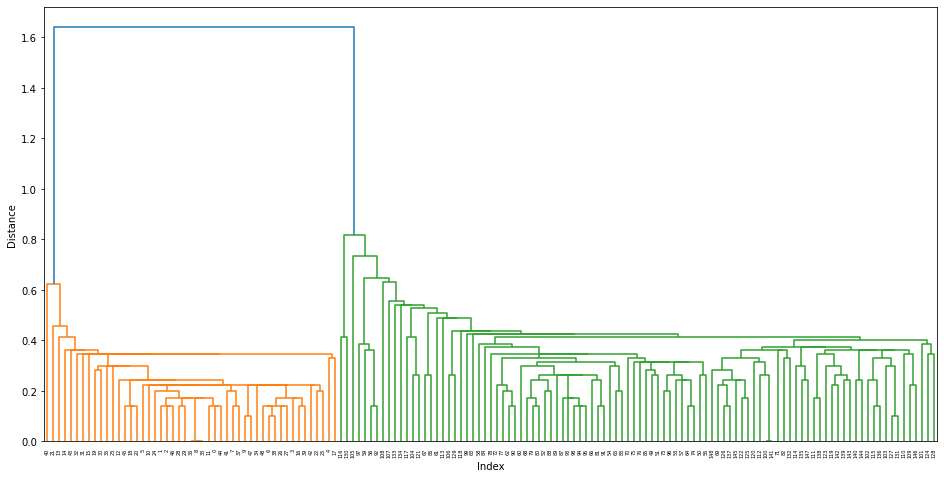

In [26]:
dist_sin = linkage(iris.loc[:,['sepal-length', 'sepal-width', 'petal-length', 'petal-width']], method="single")
plt.figure(figsize=(16,8))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')

In [27]:
iris = iris.iloc[:,[0,1,2,3]].values

In [28]:
from sklearn.cluster import KMeans

In [30]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++",
    max_iter=300, n_init=10, random_state=42)
    kmeans.fit(iris)
    wcss.append(kmeans.inertia_)

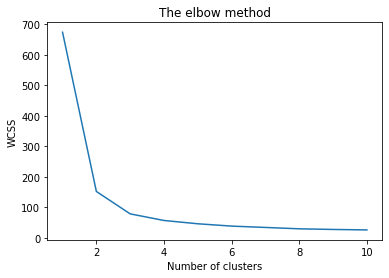

In [31]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = kmeans.fit_predict(iris)

In [34]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score

In [35]:
kMedoids = KMedoids(n_clusters=3, random_state=42)
kMedoids.fit(iris)
y_kmed = kMedoids.fit_predict(iris)

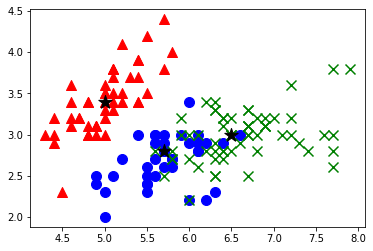

In [36]:
plt.scatter(iris[y_kmed==0, 0], iris[y_kmed == 0, 1],
s=100, marker='o', c='blue', label='Iris-Setosa')

plt.scatter(iris[y_kmed==1, 0], iris[y_kmed == 1, 1],
s=100, marker='^', c='red', label='Iris-Versicolour')

plt.scatter(iris[y_kmed==2, 0], iris[y_kmed == 2, 1],
s=100, marker='x', c='green', label='Iris-Virginica')

plt.scatter(kMedoids.cluster_centers_[:, 0], kMedoids.cluster_centers_[:, 1],
s=200, marker='*', c='black', label='Iris-Setosa')